# Covid-19 Turkey 

### Regression for Exponential Growth - Applied to the Corona Virus

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
#sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#pip install datapackage

In [3]:
from datapackage import Package

package = Package('https://datahub.io/core/covid-19/datapackage.json')

In [4]:
# print list of all resources:
print(package.resource_names)

['validation_report', 'time-series-19-covid-combined_csv', 'key-countries-pivoted_csv', 'countries-aggregated_csv', 'worldwide-aggregated_csv', 'time-series-19-covid-combined_json', 'key-countries-pivoted_json', 'countries-aggregated_json', 'worldwide-aggregated_json', 'covid-19_zip', 'time-series-19-covid-combined_csv_preview', 'countries-aggregated_csv_preview', 'time-series-19-covid-combined', 'key-countries-pivoted', 'countries-aggregated', 'worldwide-aggregated']


In [5]:
countries_aggregated_csv = package.get_resource('countries-aggregated_csv').read(keyed=True)
package.get_resource('countries-aggregated_csv').headers

['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']

In [6]:
print(type(countries_aggregated_csv))

<class 'list'>


In [7]:
countries_aggregated_csv[0]

{'Date': datetime.date(2020, 1, 22),
 'Country': 'Afghanistan',
 'Confirmed': 0,
 'Recovered': 0,
 'Deaths': 0}

In [8]:
import pandas as pd

# Creating a dataframe object from listoftuples
worldwide_aggregated_df = pd.DataFrame(countries_aggregated_csv)

worldwide_aggregated_df.head()

,Confirmed,Country,Date,Deaths,Recovered
0,0,Afghanistan,2020-01-22,0,0
1,0,Albania,2020-01-22,0,0
2,0,Algeria,2020-01-22,0,0
3,0,Andorra,2020-01-22,0,0
4,0,Angola,2020-01-22,0,0


In [9]:
worldwide_aggregated_df.tail()

,Confirmed,Country,Date,Deaths,Recovered
13208,153,Venezuela,2020-04-03,7,52
13209,237,Vietnam,2020-04-03,0,85
13210,194,West Bank and Gaza,2020-04-03,1,21
13211,39,Zambia,2020-04-03,1,2
13212,9,Zimbabwe,2020-04-03,1,0


In [10]:
worldwide_aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13213 entries, 0 to 13212
Data columns (total 5 columns):
Confirmed    13213 non-null int64
Country      13213 non-null object
Date         13213 non-null object
Deaths       13213 non-null int64
Recovered    13213 non-null int64
dtypes: int64(3), object(2)
memory usage: 516.2+ KB


# Turkey

In [11]:
turkey_df = worldwide_aggregated_df[ worldwide_aggregated_df['Country'] == 'Turkey' ]

In [12]:
turkey_df.tail()

,Confirmed,Country,Date,Deaths,Recovered
12476,10827,Turkey,2020-03-30,168,162
12657,13531,Turkey,2020-03-31,214,243
12838,15679,Turkey,2020-04-01,277,333
13019,18135,Turkey,2020-04-02,356,415
13200,20921,Turkey,2020-04-03,425,484


In [13]:
# Reorder columns

columns = turkey_df.columns.tolist()
print(type(columns[0:]))
print(type(columns[2:]))
print(columns[0:1],columns[2:])
new_columns = columns[0:1] + columns[2:] 
print(new_columns)

turkey_df_new = turkey_df[new_columns]
turkey_df_new.tail()

<class 'list'>
<class 'list'>
['Confirmed'] ['Date', 'Deaths', 'Recovered']
['Confirmed', 'Date', 'Deaths', 'Recovered']


,Confirmed,Date,Deaths,Recovered
12476,10827,2020-03-30,168,162
12657,13531,2020-03-31,214,243
12838,15679,2020-04-01,277,333
13019,18135,2020-04-02,356,415
13200,20921,2020-04-03,425,484


In [14]:
### Confirmed Cases bigger than 0

turkey_df_new_starting = turkey_df_new [turkey_df_new['Confirmed'] > 0]
turkey_df_new_starting.head()

,Confirmed,Date,Deaths,Recovered
9037,1,2020-03-11,0,0
9218,1,2020-03-12,0,0
9399,5,2020-03-13,0,0
9580,5,2020-03-14,0,0
9761,6,2020-03-15,0,0


### Plotting

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams

[]

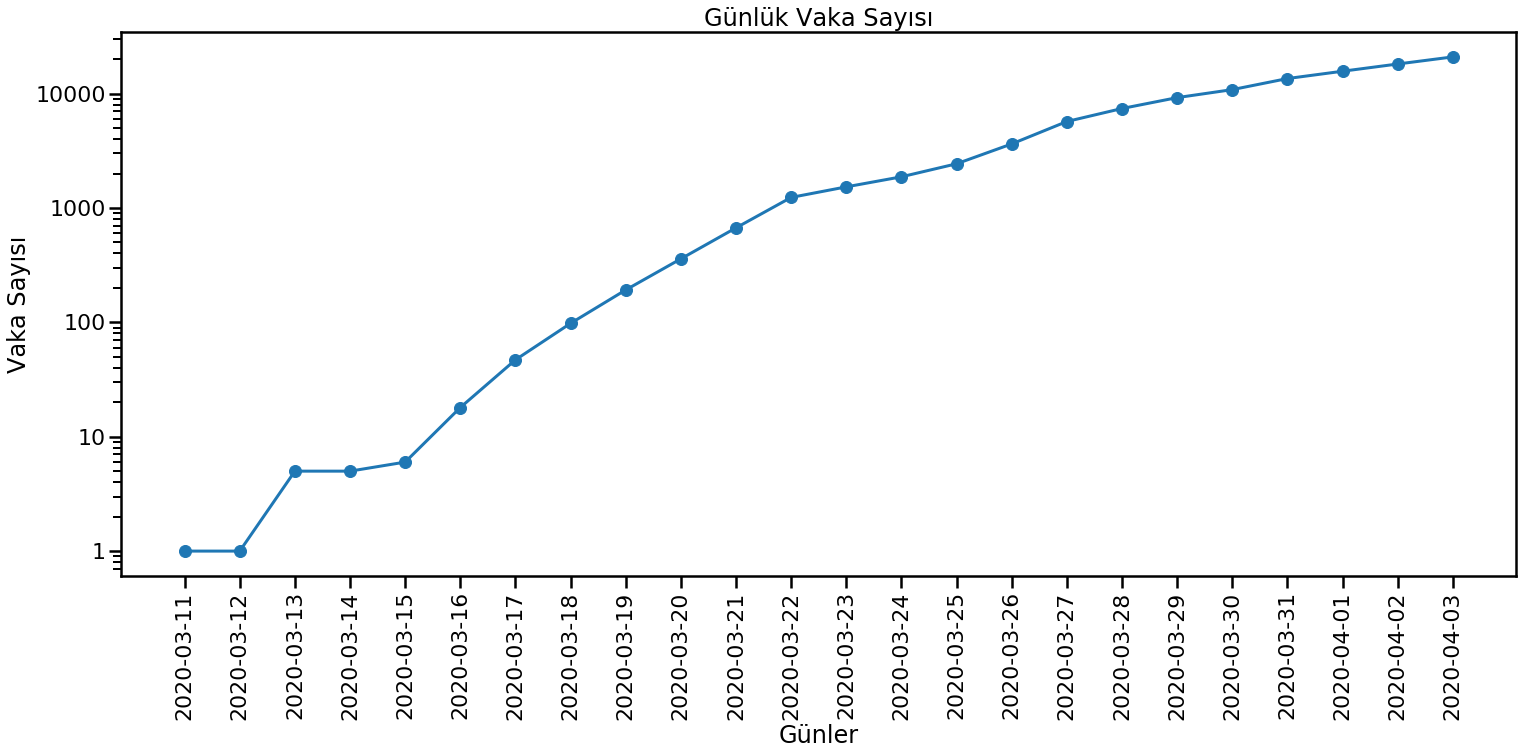

In [36]:
# Plot

plt.plot(turkey_df_new_starting.Date, turkey_df_new_starting.Confirmed, '-o')
rcParams['figure.figsize'] = 50, 10
plt.title('Günlük Vaka Sayısı')
plt.ylabel('Vaka Sayısı')
plt.yscale('log')
plt.xlabel('Günler')

positions = turkey_df_new_starting['Date']
labels = turkey_df_new_starting['Date']
plt.xticks(positions, labels,rotation=90)

plt.yticks((0,1,10,100,1000,10000,100000), (0,1,10,100,1000,10000,100000))

plt.plot()


In [17]:
print(type(turkey_df_new_starting.Date))

<class 'pandas.core.series.Series'>


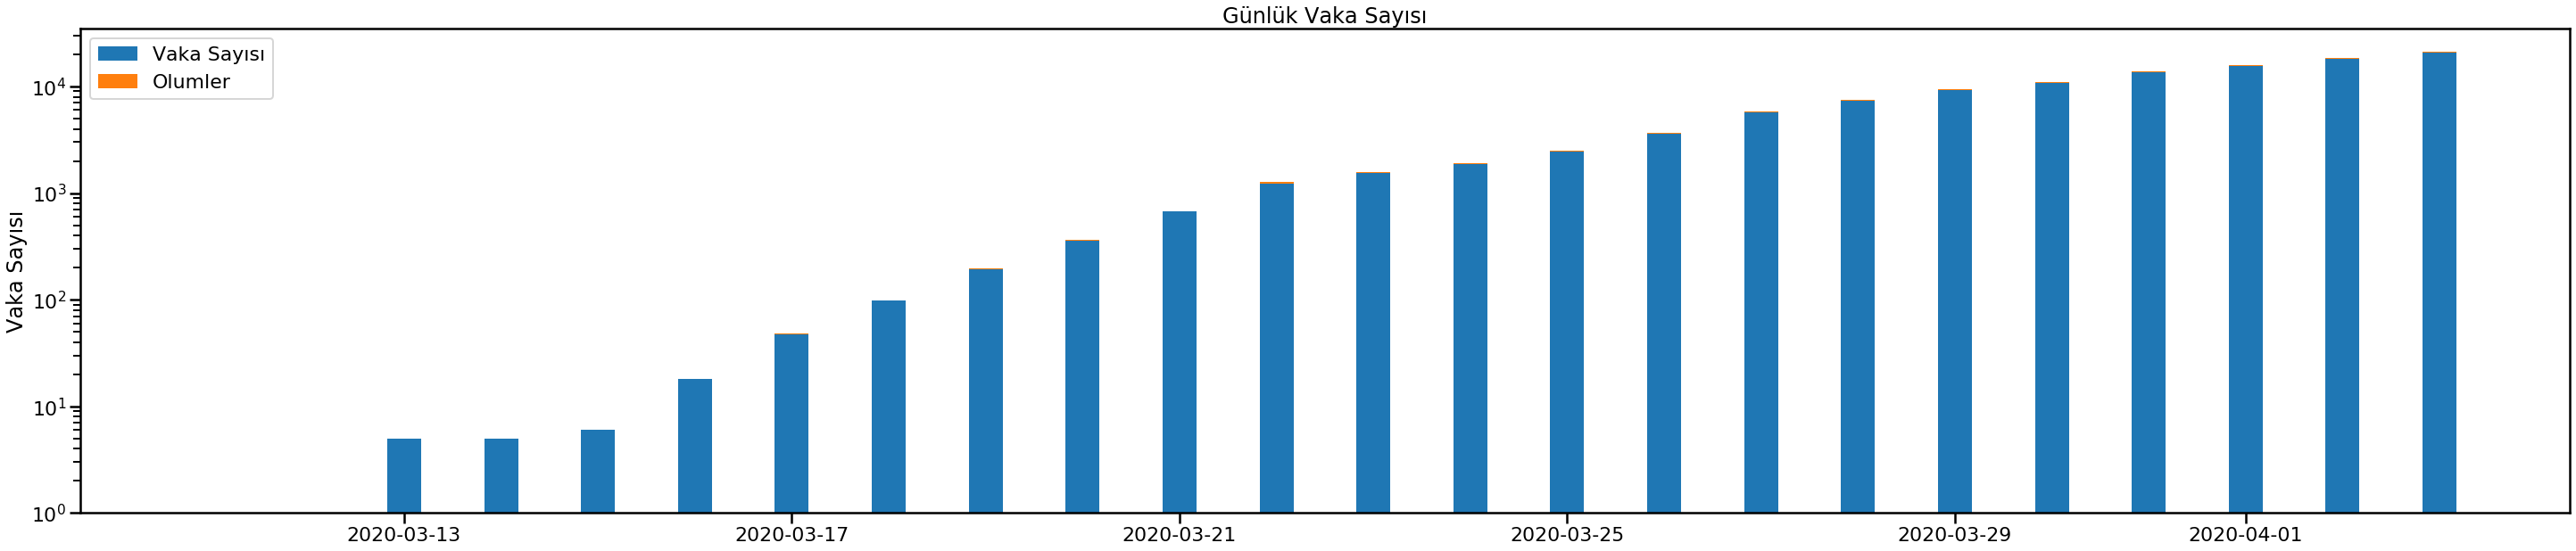

In [18]:
labels = turkey_df_new_starting['Date']

width = 0.35 

fig, ax = plt.subplots()
ax.bar(labels, turkey_df_new_starting['Confirmed'].tolist(), width, label = 'Vaka Sayısı')
ax.bar(labels, turkey_df_new_starting['Deaths'].tolist(), width, bottom = turkey_df_new_starting['Confirmed'].tolist(), label='Olumler')
plt.yscale('log')
ax.set_ylabel('Vaka Sayısı')
ax.set_title('Günlük Vaka Sayısı')
ax.legend()

plt.show()

### Regression for Exponential Growth - Applied to the Corona Virus

In [19]:
# My model is  confirmed = a * b ^ Time

# y = a * b ^ t

# log(y) = log(a) + Time * log(b) { [this is a linear relationship: y=a+bx] } 

# lets apply linear regression

In [20]:
import numpy as np
a = np.log(turkey_df_new_starting['Confirmed'])
turkey_df_new_starting['log_Confirmed'] = a
turkey_df_new_starting.head()

/Users/Murat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Confirmed,Date,Deaths,Recovered,log_Confirmed
9037,1,2020-03-11,0,0,0.000000
9218,1,2020-03-12,0,0,0.000000
9399,5,2020-03-13,0,0,1.609438
9580,5,2020-03-14,0,0,1.609438
9761,6,2020-03-15,0,0,1.791759


In [21]:
df = turkey_df_new_starting

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.tail()

,Confirmed,Date,Deaths,Recovered,log_Confirmed
19,10827,2020-03-30,168,162,9.289798
20,13531,2020-03-31,214,243,9.512739
21,15679,2020-04-01,277,333,9.660078
22,18135,2020-04-02,356,415,9.805599
23,20921,2020-04-03,425,484,9.948509


In [24]:
# Import regression modules

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [25]:
X_values= df.index.values
X = sm.add_constant(X_values)
print(type(X))

<class 'numpy.ndarray'>


In [26]:
# statsmodels works nicely with pandas dataframes

y = df['log_Confirmed']

In [27]:
mod  = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_Confirmed   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     353.6
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           4.81e-15
Time:                        10:07:57   Log-Likelihood:                -28.143
No. Observations:                  24   AIC:                             60.29
Df Residuals:                      22   BIC:                             62.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9131      0.323      2.826      0.0

In [28]:
print(res.params)

const    0.913087
x1       0.452730
dtype: float64


In [29]:
print('const: ', res.params[0])

print('constant: ', np.exp(res.params[0]))

const:  0.9130867739075875
constant:  2.4920029230738074


In [30]:
print('x1: ', res.params[1])

print('Grow rate: ', np.exp(res.params[1]))

x1:  0.4527297043561816
Grow rate:  1.5725990623861275


In [31]:
# actual function: confirmed_predicted = np.exp(const) * np.exp(Time) ** t

In [32]:
def linear_predictions(t):
    return np.exp(res.params[0]) * np.exp(res.params[1]) ** t

In [33]:
df['Time'] = X_values
df

/Users/Murat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Confirmed,Date,Deaths,Recovered,log_Confirmed,Time
0,1,2020-03-11,0,0,0.000000,0
1,1,2020-03-12,0,0,0.000000,1
2,5,2020-03-13,0,0,1.609438,2
3,5,2020-03-14,0,0,1.609438,3
4,6,2020-03-15,0,0,1.791759,4
5,18,2020-03-16,0,0,2.890372,5
6,47,2020-03-17,1,0,3.850148,6
7,98,2020-03-18,1,0,4.584967,7
8,192,2020-03-19,3,0,5.257495,8
9,359,2020-03-20,4,0,5.883322,9


In [34]:
df['Confirmed_Predictions'] = df.Time.apply(linear_predictions)
df

/Users/Murat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Confirmed,Date,Deaths,Recovered,log_Confirmed,Time,Confirmed_Predictions
0,1,2020-03-11,0,0,0.000000,0,2.492003
1,1,2020-03-12,0,0,0.000000,1,3.918921
2,5,2020-03-13,0,0,1.609438,2,6.162892
3,5,2020-03-14,0,0,1.609438,3,9.691759
4,6,2020-03-15,0,0,1.791759,4,15.241250
5,18,2020-03-16,0,0,2.890372,5,23.968376
6,47,2020-03-17,1,0,3.850148,6,37.692646
7,98,2020-03-18,1,0,4.584967,7,59.275419
8,192,2020-03-19,3,0,5.257495,8,93.216469
9,359,2020-03-20,4,0,5.883322,9,146.592131


[]

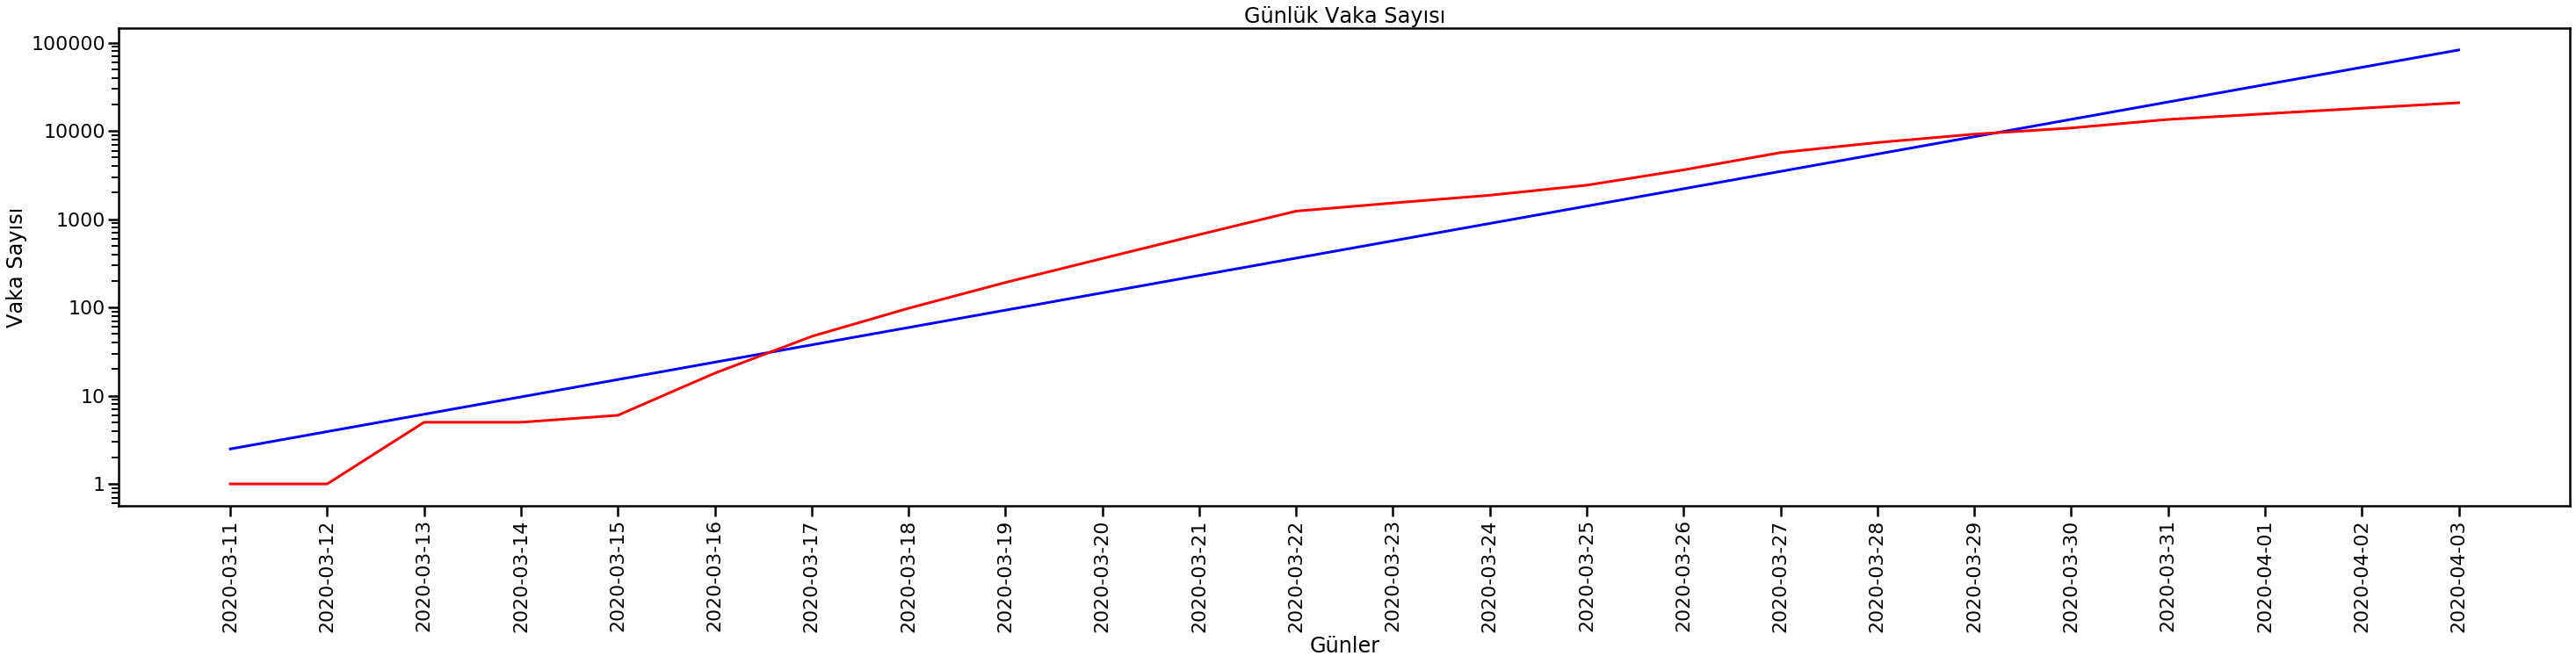

In [35]:
# Plot
plt.plot(df.Date, df.Confirmed_Predictions, 'blue')
plt.plot(df.Date, df.Confirmed, 'red')
rcParams['figure.figsize'] = 25, 10
plt.title('Günlük Vaka Sayısı')
plt.ylabel('Vaka Sayısı')
plt.yscale('log')
plt.xlabel('Günler')

positions = turkey_df_new_starting['Date']
labels = turkey_df_new_starting['Date']
plt.xticks(positions, labels,rotation=90)

plt.yticks((0,1,10,100,1000,10000,100000), (0,1,10,100,1000,10000,100000))

plt.plot()